# Hackathon Submission 2021 (Machine Learning) : Conversion Fraud in Digital Advertising

In this project we will be working with a Digital advertising fraud data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

*Import necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np


import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
training = pd.read_csv('Excels/Hackathon/Training Data.csv')

training.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,...,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [3]:
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   clientid_cr                    965 non-null    int64  
 1   clmbuserid_cr                  965 non-null    object 
 2   conversiontime_cr              965 non-null    float64
 3   imprid_cr                      965 non-null    object 
 4   adslotdimid_cr                 965 non-null    int64  
 5   algo_cr                        945 non-null    float64
 6   audiences_cr                   766 non-null    object 
 7   clickbid_cr                    669 non-null    float64
 8   geodimid_cr                    965 non-null    int64  
 9   ip_cr                          945 non-null    object 
 10  itemcolumbiaid_cr              965 non-null    int64  
 11  itemid_cr                      965 non-null    int64  
 12  position_cr                    945 non-null    flo

In [4]:
#we drop most of the empty columns as they are of no use

training = training.drop(['uvh_cr', 'uv_cr','platformId_cr','sdkVersion_cr','refClusterId_cr','conversionid_cr','optimize_on_cr','bundleId_cr'], axis=1)

In [5]:
training.conversion_fraud.unique()

array([ True, False])

In [6]:
#here, we drop most of the NaN columns
training.drop(['conversiontime_cr', 'ip_cr', 'time_cr', 'deviceId_cr','usrClusterId_cr', 'cityGrpDimId_cr','siteClusterIds_cr',
              'paid_cr', 'spend_cr', 'attributionType_cr'], axis=1, inplace=True)



In [7]:
#we dropped the columns in which data is irrelevant for model

training.drop(['audiences_cr', 'refurl_cr', 'adLogType_cr', 'v_cr','allAudiences_cr','lookUpFrom_cr',
              'connTypeDimId_cr', 'goalTypeId_cr', 'impressionTimeInMillis_cr', 'clickTimeInMillis_cr',
              'uuidSource_cr','pricingtype_cr'], axis=1, inplace=True)



In [8]:
training.isna().sum()

clientid_cr                        0
clmbuserid_cr                      0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                           20
clickbid_cr                      296
geodimid_cr                        0
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                       20
pubclientid_cr                     0
siteId_cr                          0
templateid_cr                    107
goalid_cr                          0
osId_cr                           21
browserId_cr                      21
cityId_cr                         20
stateId_cr                        20
modelDimId_cr                     21
ispDimId_cr                       20
countryDimId_cr                   20
conversionDurationInMillis_cr     20
osVerDimId_cr                     21
geoGrpDimId_cr                    20
stateGrpDimId_cr                 105
conversion_fraud                   0
dtype: int64

In [9]:
training.shape

(965, 26)

In [10]:
#these columns have more NA values.
training.drop(['stateGrpDimId_cr', 'templateid_cr', 'clickbid_cr'], axis=1, inplace=True)


In [11]:
training.isna().sum()

clientid_cr                       0
clmbuserid_cr                     0
imprid_cr                         0
adslotdimid_cr                    0
algo_cr                          20
geodimid_cr                       0
itemcolumbiaid_cr                 0
itemid_cr                         0
position_cr                      20
pubclientid_cr                    0
siteId_cr                         0
goalid_cr                         0
osId_cr                          21
browserId_cr                     21
cityId_cr                        20
stateId_cr                       20
modelDimId_cr                    21
ispDimId_cr                      20
countryDimId_cr                  20
conversionDurationInMillis_cr    20
osVerDimId_cr                    21
geoGrpDimId_cr                   20
conversion_fraud                  0
dtype: int64

In [12]:
training =training.dropna(axis=0, how='any')

In [13]:
training.shape

(944, 23)

In [14]:
training.isna().sum()

clientid_cr                      0
clmbuserid_cr                    0
imprid_cr                        0
adslotdimid_cr                   0
algo_cr                          0
geodimid_cr                      0
itemcolumbiaid_cr                0
itemid_cr                        0
position_cr                      0
pubclientid_cr                   0
siteId_cr                        0
goalid_cr                        0
osId_cr                          0
browserId_cr                     0
cityId_cr                        0
stateId_cr                       0
modelDimId_cr                    0
ispDimId_cr                      0
countryDimId_cr                  0
conversionDurationInMillis_cr    0
osVerDimId_cr                    0
geoGrpDimId_cr                   0
conversion_fraud                 0
dtype: int64

In [15]:
training.describe()

,clientid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,goalid_cr,osId_cr,browserId_cr,cityId_cr,stateId_cr,modelDimId_cr,ispDimId_cr,countryDimId_cr,conversionDurationInMillis_cr,osVerDimId_cr,geoGrpDimId_cr
count,944.000000,944.000000,944.000000,944.000000,9.440000e+02,9.440000e+02,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,9.440000e+02,944.000000,944.000000
mean,63848.096398,287254.198093,137.406780,483.256356,5.525878e+06,5.082854e+07,2.127780e+07,24657.521186,1235.479873,6107.900424,173837.368644,123088.689619,8827.622881,12724.950212,143725.449153,209454.640890,147.106992,1.823850e+07,227607.407839,348011.128178
std,24582.755433,82884.657093,1688.419641,10337.433214,1.185046e+05,2.118765e+06,6.463321e+07,31645.843134,1420.776806,2678.385729,33740.805396,32164.695704,31292.103328,36667.215797,91995.493249,74620.211558,29.087140,1.586194e+08,91556.679672,0.627651
min,802.000000,129117.000000,1.000000,144.000000,3.238328e+06,3.500705e+07,0.000000e+00,1.000000,3.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,2.000000e+02,0.000000,348011.000000
25%,67368.000000,233531.000000,18.000000,144.000000,5.488773e+06,4.950416e+07,1.000000e+00,2618.750000,34.000000,6384.000000,129311.000000,129426.750000,435.000000,1806.000000,0.000000,136127.000000,144.000000,3.152500e+03,199414.000000,348011.000000
50%,75694.000000,332775.000000,33.000000,144.000000,5.488773e+06,4.950416e+07,1.000000e+00,15240.000000,178.500000,6384.000000,196058.000000,129639.000000,438.000000,1808.000000,202038.000000,265618.000000,144.000000,7.677500e+03,199452.000000,348011.000000
75%,75694.000000,355688.000000,38.000000,144.000000,5.596985e+06,5.318414e+07,2.250000e+00,16258.000000,3120.500000,6384.000000,196061.000000,129639.000000,10262.250000,1817.000000,202038.000000,280429.000000,144.000000,1.000610e+05,359919.000000,348011.000000
max,86555.000000,360638.000000,26006.000000,317759.000000,5.620639e+06,5.393064e+07,8.157052e+08,85030.000000,3296.000000,10679.000000,360620.000000,196034.000000,347087.000000,341146.000000,231258.000000,286194.000000,434.000000,2.519155e+09,361447.000000,348017.000000


In [16]:
training.dtypes

clientid_cr                        int64
clmbuserid_cr                     object
imprid_cr                         object
adslotdimid_cr                     int64
algo_cr                          float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
goalid_cr                          int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
ispDimId_cr                      float64
countryDimId_cr                  float64
conversionDurationInMillis_cr    float64
osVerDimId_cr                    float64
geoGrpDimId_cr                   float64
conversion_fraud                    bool
dtype: object

# Now, we do EDA on click_log

In [17]:
click_log =  pd.read_csv('Excels/Hackathon/click_log.csv')

click_log.head()

,Unnamed: 0,imprId,clmbUserId,adSltDimId,auds,allAuds,itemid,algo,advClientId,pubClientId,...,devTypeDimId,vendorDimId,modelDimId,connTypeDimId,browserDimId,refClusterId,fraud,cpa,imprUserId,optout
0,0,72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts,e91fcf75-a645-40f6-ab1f-411017d1d19a-631k,207251,"2vv,8k8,8gv,2vk,8gw,joa","7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy,ic...",52696204,18,330,2310,...,196047.0,196460.0,202038.0,264494,129639.0,NaN,NaN,NaN,NaN,NaN
1,0,210a7e16-6783-46a5-9246-c635db091490-3qpg,be37dc3a-d12b-4aa5-bd39-1e42ede9d6b9-6mhk,356952,"8gw,2vb,o3b","hkf,n5n,59j,p9q,n3p,p9t,o1o,41j,o1n,nyw,n3s,n5...",53622457,18,330,85030,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
2,0,179d3fbb-3e10-435d-851d-f65029ef2eb4-10ntc,faceec73-d833-4bd6-b878-3bc27d2638dd-10uao,350086,"2vv,8k8,2vk,8gw","o1j,o1o,oy7,o1n,nyw,oww,lo4,p12,apc,358,5o2,o6...",53622457,38,330,2658,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
3,0,79ce617b-88bf-46db-8069-6c892df6a306-1sjo8,113b0b7e-d065-4f14-861e-7bbb49683b15-10u2c,356952,"2vv,nqv,2vk,8gw,2vb,o3b","n7j,pf9,n90,n91,n98,o1o,nyw,o1n,lo4,nqv,igs,ap...",53622457,38,330,85030,...,196047.0,196460.0,202038.0,264496,129639.0,NaN,NaN,NaN,NaN,NaN
4,0,c8f88058-af7e-4284-8c88-2410d94f82e3-1sjo8,2b3dac7e-d4dd-4ae7-936d-1f9b4c73493d-h0hg,129239,"8kv,8j6,8k8,2vk,2vl,8gw,3si,2vt,2vv,nqv,2vb,8l...","n7j,nyw,592,n7x,n7z,qq5,apc,n8a,359,n8e,n8g,ap...",53622457,38,330,15240,...,196047.0,196460.0,202038.0,264494,129639.0,NaN,NaN,NaN,NaN,NaN


In [18]:
#we drop unnecessary colums

click_log.drop(['auds','allAuds', 'refUrl', 'callIdentifier', 'usrClusterId', 'siteClusterIds', 'ctxCatId',
               'refClusterId','cpa', 'imprUserId','optout','refClusterId', 'fraud', 'adBlockerDetectionValueId',
               'bundleId', 'impressionServedTimeStamp', 'appver','connTypeDimId', 'modelDimId','vendorDimId',
               'topic','uuidSource','callIdentifier','paid','clickXForwardedFor','advClientId',
               'algo','tmpltId', 'osDimId','browserDimId'], axis=1, inplace=True)



In [19]:
click_log.dtypes

Unnamed: 0         int64
imprId            object
clmbUserId        object
adSltDimId         int64
itemid             int64
pubClientId        int64
itmClmbLId         int64
clickBid         float64
position           int64
siteId             int64
crtd             float64
adslotRatio      float64
pricingType      float64
clickIp           object
clickGeoId       float64
esi              float64
ip                object
geoDimId           int64
countryDimId       int64
geoGrpDimId      float64
cityDimId        float64
cityGrpDimId     float64
stateDimId       float64
stateGrpDimId    float64
ispDimId         float64
osVerDimId       float64
devTypeDimId     float64
dtype: object

In [20]:
#Now, we concat two dataframes, training and clicklog

train_new = pd.concat([training, click_log.reindex(training.index)], axis=1)



In [21]:
train_new.dtypes

clientid_cr                        int64
clmbuserid_cr                     object
imprid_cr                         object
adslotdimid_cr                     int64
algo_cr                          float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
goalid_cr                          int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
ispDimId_cr                      float64
countryDimId_cr                  float64
conversionDurationInMillis_cr    float64
osVerDimId_cr                    float64
geoGrpDimId_cr                   float64
conversion_fraud                    bool
Unnamed: 0                         int64
imprId          

In [22]:
#we drop some irrelevant columns from new dataframe

train_new.drop(['Unnamed: 0'], axis=1, inplace=True)



In [23]:
train_new.shape

(944, 49)

In [24]:
train_new.isnull().sum()  #check for NAN values

clientid_cr                        0
clmbuserid_cr                      0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                            0
geodimid_cr                        0
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                        0
pubclientid_cr                     0
siteId_cr                          0
goalid_cr                          0
osId_cr                            0
browserId_cr                       0
cityId_cr                          0
stateId_cr                         0
modelDimId_cr                      0
ispDimId_cr                        0
countryDimId_cr                    0
conversionDurationInMillis_cr      0
osVerDimId_cr                      0
geoGrpDimId_cr                     0
conversion_fraud                   0
imprId                             0
clmbUserId                         0
adSltDimId                         0
itemid                             0
p

In [25]:
train_new.clickBid.unique()

array([13.1004    ,  4.58514   ,  5.0946    ,  4.92712513,  4.83653325,
        4.69229883,  4.83956033,  4.77757155,         nan,  5.74452   ,
        5.6736    ,  5.13558552,  6.3828    ,  5.10624   ,  7.092     ,
        6.17970194,  5.27481808,  5.99756676,  5.60777162,  5.4684814 ,
        5.59905536,  5.40379783,  5.20791734,  5.67279758,  5.25959199,
        6.21241812,  5.3702796 ,  5.21544793,  5.14779037,  6.27937009,
        5.27967133,  6.85575201,  5.29435858])

In [26]:
train_new.clickBid.median()

5.607771625

In [27]:
#we replcae NAN values of 'clickBid' with its median

train_new['clickBid'].fillna(train_new.clickBid.median(), inplace=True)

train_new.clickBid.unique()

array([13.1004    ,  4.58514   ,  5.0946    ,  4.92712513,  4.83653325,
        4.69229883,  4.83956033,  4.77757155,  5.60777162,  5.74452   ,
        5.6736    ,  5.13558552,  6.3828    ,  5.10624   ,  7.092     ,
        6.17970194,  5.27481808,  5.99756676,  5.4684814 ,  5.59905536,
        5.40379783,  5.20791734,  5.67279758,  5.25959199,  6.21241812,
        5.3702796 ,  5.21544793,  5.14779037,  6.27937009,  5.27967133,
        6.85575201,  5.29435858])

In [28]:
# we delete these two columns 'cityGrpDimId' and 'stateGrpDimId' as there are more NAN values

train_new.drop(['cityGrpDimId','stateGrpDimId'], axis=1, inplace=True)

train_new.isnull().sum()

clientid_cr                      0
clmbuserid_cr                    0
imprid_cr                        0
adslotdimid_cr                   0
algo_cr                          0
geodimid_cr                      0
itemcolumbiaid_cr                0
itemid_cr                        0
position_cr                      0
pubclientid_cr                   0
siteId_cr                        0
goalid_cr                        0
osId_cr                          0
browserId_cr                     0
cityId_cr                        0
stateId_cr                       0
modelDimId_cr                    0
ispDimId_cr                      0
countryDimId_cr                  0
conversionDurationInMillis_cr    0
osVerDimId_cr                    0
geoGrpDimId_cr                   0
conversion_fraud                 0
imprId                           0
clmbUserId                       0
adSltDimId                       0
itemid                           0
pubClientId                      0
itmClmbLId          

In [29]:
train_new.clmbuserid_cr.unique() #as these are unique values (categorical features). we convert into 'Label encoding'

array(['31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw',
       '4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg',
       'cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg',
       'f79f3de7-5edb-4319-9549-117f47996066-10wrk',
       '01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts',
       '10a967f6-c991-4f33-a212-9b42c8a60126-10w2k',
       '6ad61f5f-bf5a-445d-a314-930e94e47fbc-1sjfw',
       '59582f67-7cd3-4748-82d4-15928b166533-6mc0',
       '224654bd-4798-4e62-8c15-72b4ba6cc379-10ol4',
       'c6cee14f-3652-4786-a3e7-ba69d575f1f3-1siz8',
       '4c53d7be-7a92-43e6-8e18-9f6375237b07-3ppc',
       '38f33cff-24aa-4208-b5fa-bbf661c0fa25-1sjio',
       'c0f6075e-b8df-438e-85d7-839dc5eb54a2-3ppc',
       '5e3a578f-6c3b-487a-ae6d-8256acb52190-1siwg',
       '1db32d40-20e2-4365-a2fb-d4a0aba4f02f-10wj8',
       '52251623-b731-48a0-be81-924789df8410-3ps4',
       'f1e2610e-8073-46ff-8e8b-30f66e02d31f-1sjzc',
       'd35dde2d-1870-4a2f-8931-f86d7fc4d2e5-6m3o',
       'f2eb7a65-8ca7-49d8-95ec-61eb4c398fd1-3rh8',

#As some of the columns are Categorical data, we need to convert into numeric data for training.
ML and DL models only understand numeric values. Hence it it mandatory to convert categorical features into numeric

Hence, we use LabelEncoder from sklearn library, which will assign unique numbers (strating from 0,1,2,3,4...) to each catergory

In [30]:
#now we convert some of the categorical features in to 'one hot encoding'

from sklearn.preprocessing import LabelEncoder

le_clmbuserid_cr = LabelEncoder()
le_imprid_cr = LabelEncoder()


In [31]:
#in input dataframe, we create new columns of these LabelEncoders

train_new['clmbuserid_cr_le'] = le_clmbuserid_cr.fit_transform(train_new['clmbuserid_cr'])
train_new['imprid_cr_le'] = le_imprid_cr.fit_transform(train_new['imprid_cr'])

train_new.head()

,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,geoDimId,countryDimId,geoGrpDimId,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId,clmbuserid_cr_le,imprid_cr_le
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,144,5488088,49504155,1.0,2320,...,144,144,348011.0,440.0,1802.0,136127.0,199414.0,196047.0,192,8
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,144,5488773,49504157,1.0,15240,...,144,144,348011.0,10292.0,1812.0,280429.0,199452.0,196047.0,287,931
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,144,5488088,49504160,1.0,2320,...,144,144,348011.0,435.0,129163.0,280429.0,199414.0,196047.0,742,26
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,144,5488088,49504155,1.0,2320,...,144,144,348011.0,10255.0,1804.0,136127.0,199522.0,196047.0,870,48
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,144,5614054,53607445,1.0,1,...,144,144,348011.0,0.0,1804.0,132590.0,199522.0,196047.0,9,60


In [32]:
#we delete the duplicate columns

train_new.drop(['clmbuserid_cr','imprid_cr','imprId','clmbUserId'], axis=1, inplace=True)



In [33]:
train_new.clickIp.unique()

array(['103.212.158.109', '2409:4055:2e87:42e9:4dec:ae38:609e:8932',
       '2405:201:c00e:4087:5838:cbcb:8571:e8c0', '106.213.27.57',
       '103.48.46.23', '115.187.35.123', '182.77.57.35', '103.67.189.42',
       '14.139.237.162', '2405:201:f00d:3018:8c3e:cbd3:a5f1:a8b5',
       '125.16.61.184', '124.253.24.79',
       '2409:4042:4e10:b517:88a0:9089:1a3:216d', '117.248.86.35',
       '123.136.20.22', '61.1.64.101', '180.211.100.182', '42.111.213.5',
       '2409:4041:2e9c:6cd4:c28f:9dd2:95c7:d197', '59.97.80.140',
       '2401:4900:503a:9407:fdae:fffd:9829:376f', '223.177.63.188',
       '117.193.204.233', '2402:8100:208a:3cb9::280:7f3c', '115.187.46.8',
       '154.113.102.122', '2409:4073:2e99:87ea:cc2c:dc59:742f:6bd0',
       '117.215.131.86', '2401:4900:18e8:273::233:9b3b',
       '223.235.102.216', '2409:4052:209e:cca4:ad6a:1fd4:8905:738a',
       '117.204.85.248', '115.96.219.139', '27.7.117.29',
       '117.251.193.114', '61.14.204.34', '103.83.58.228',
       '103.206.138.23

Here, the IP addresses need to be converted to numeric value, hence we import 'ipaddress' library, which converts ipv4 and ipv6 into numeric value

In [34]:
import ipaddress
clickip_new=[]
for i in train_new.clickIp:
    
    clickip_new.append(int(ipaddress.ip_address(i)))


In [35]:
clickip_new

[1741987437,
 47900243342992063709893797775794932018,
 47878210036035366955580158700483111104,
 1792351033,
 1731210775,
 1941644155,
 3058514211,
 1732492586,
 244051362,
 47878210050889360899481473048751745205,
 2098216376,
 2096961615,
 47900241847417173283179532667014291821,
 1979209251,
 2072515606,
 1023492197,
 3033752758,
 711972101,
 47900241758454398827234151395005813143,
 996233356,
 47858880785846190364998289431527503727,
 3752935356,
 1975635177,
 47865208882883550977305291198491033404,
 1941646856,
 2591123066,
 47900245719859025673408372953372912592,
 1977058134,
 47858880768724695416077942649617881915,
 3756746456,
 47900243101003241744083166150313472906,
 1976325624,
 1935727499,
 453473565,
 1979433330,
 1024379938,
 1733507812,
 1741589224,
 2872966231,
 2098479602,
 2057730313,
 1741886479,
 2057734273,
 1734774852,
 244038581,
 3413779794,
 47858880786690830721638051926193773735,
 3075635477,
 47858880776218079656082852760754894532,
 4790024570623894430559855532477

In [36]:
len(clickip_new)

944

In [37]:
train_new['clickip_new'] = clickip_new

train_new.head()

,clientid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,goalid_cr,...,countryDimId,geoGrpDimId,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new
0,75694,321300,38.0,144,5488088,49504155,1.0,2320,34,6384,...,144,348011.0,440.0,1802.0,136127.0,199414.0,196047.0,192,8,1741987437
1,75694,129239,38.0,144,5488773,49504157,1.0,15240,178,6384,...,144,348011.0,10292.0,1812.0,280429.0,199452.0,196047.0,287,931,47900243342992063709893797775794932018
2,75694,321554,21.0,144,5488088,49504160,1.0,2320,34,6384,...,144,348011.0,435.0,129163.0,280429.0,199414.0,196047.0,742,26,47878210036035366955580158700483111104
3,75694,321300,38.0,144,5488088,49504155,1.0,2320,34,6384,...,144,348011.0,10255.0,1804.0,136127.0,199522.0,196047.0,870,48,1792351033
4,30431,355768,21.0,144,5614054,53607445,1.0,1,3296,3370,...,144,348011.0,0.0,1804.0,132590.0,199522.0,196047.0,9,60,1731210775


In [38]:
ip_new=[]
for i in train_new.ip:
    
    ip_new.append(int(ipaddress.ip_address(i)))


In [39]:
ip_new

[2058384094,
 47900243342992063709893797775794932018,
 47878210036035366955580158700483111104,
 1792351033,
 1731210775,
 1941644155,
 3058514211,
 1732492586,
 244051362,
 47878210050889360899481473048751745205,
 2098216376,
 2096961615,
 2553923712,
 1979209251,
 2072515606,
 1023492197,
 3033752758,
 711972101,
 47900241758454398827234151395005813143,
 996233356,
 47858880785826547865481829225744305326,
 3752935356,
 1975635177,
 47865208882883550977305291198491033404,
 1941646856,
 2591123066,
 47900245719859025673408372953372912592,
 1977058134,
 47858880768724695416077942649617881915,
 3756746456,
 47900243101003241744083166150313472906,
 1976325624,
 1935727499,
 453473565,
 1979433330,
 1024379938,
 1733507812,
 1741589224,
 2872966231,
 2098479602,
 2057730313,
 1741886479,
 2057734273,
 1734774852,
 244038581,
 3413779794,
 47858880786690830721638051926193773735,
 3075635477,
 47858880776218079656082852760754894532,
 47900245706238944305598555324777587936,
 3756720871,
 30579

In [40]:
train_new['ip_new'] = ip_new



In [41]:
train_new.drop(['clickIp', 'ip'], axis=1, inplace=True)

In [42]:
train_new.clickip_new.unique()

array([1741987437, 47900243342992063709893797775794932018,
       47878210036035366955580158700483111104, 1792351033, 1731210775,
       1941644155, 3058514211, 1732492586, 244051362,
       47878210050889360899481473048751745205, 2098216376, 2096961615,
       47900241847417173283179532667014291821, 1979209251, 2072515606,
       1023492197, 3033752758, 711972101,
       47900241758454398827234151395005813143, 996233356,
       47858880785846190364998289431527503727, 3752935356, 1975635177,
       47865208882883550977305291198491033404, 1941646856, 2591123066,
       47900245719859025673408372953372912592, 1977058134,
       47858880768724695416077942649617881915, 3756746456,
       47900243101003241744083166150313472906, 1976325624, 1935727499,
       453473565, 1979433330, 1024379938, 1733507812, 1741589224,
       2872966231, 2098479602, 2057730313, 1741886479, 2057734273,
       1734774852, 244038581, 3413779794,
       47858880786690830721638051926193773735, 3075635477,
       47

In [43]:
le_conversion_fraud = LabelEncoder()

train_new['conversion_fraud_le'] = le_conversion_fraud.fit_transform(train_new['conversion_fraud'])

In [44]:
train_new.conversion_fraud_le.unique()

array([1, 0], dtype=int64)

In [45]:
train_new.conversion_fraud.unique()

array([ True, False])

In [46]:
train_new.drop('conversion_fraud', axis=1, inplace=True)

train_new.head()

,clientid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,goalid_cr,...,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new,conversion_fraud_le
0,75694,321300,38.0,144,5488088,49504155,1.0,2320,34,6384,...,440.0,1802.0,136127.0,199414.0,196047.0,192,8,1741987437,2058384094,1
1,75694,129239,38.0,144,5488773,49504157,1.0,15240,178,6384,...,10292.0,1812.0,280429.0,199452.0,196047.0,287,931,47900243342992063709893797775794932018,47900243342992063709893797775794932018,1
2,75694,321554,21.0,144,5488088,49504160,1.0,2320,34,6384,...,435.0,129163.0,280429.0,199414.0,196047.0,742,26,47878210036035366955580158700483111104,47878210036035366955580158700483111104,1
3,75694,321300,38.0,144,5488088,49504155,1.0,2320,34,6384,...,10255.0,1804.0,136127.0,199522.0,196047.0,870,48,1792351033,1792351033,1
4,30431,355768,21.0,144,5614054,53607445,1.0,1,3296,3370,...,0.0,1804.0,132590.0,199522.0,196047.0,9,60,1731210775,1731210775,1


In [47]:
train_new.dtypes

clientid_cr                        int64
adslotdimid_cr                     int64
algo_cr                          float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
goalid_cr                          int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
ispDimId_cr                      float64
countryDimId_cr                  float64
conversionDurationInMillis_cr    float64
osVerDimId_cr                    float64
geoGrpDimId_cr                   float64
adSltDimId                         int64
itemid                             int64
pubClientId                        int64
itmClmbLId                         int64
clickBid        

As we see n above dtypes, 'clickip_new' and 'ip_new' both are still 'object', and we need it to in float/int.

Hence, we convert these 'object' into numeric by pandas inbuild function 'to_numeric'

In [48]:
train_new.clickip_new =  pd.to_numeric(train_new.clickip_new)

train_new.ip_new =  pd.to_numeric(train_new.ip_new)

train_new.dtypes

clientid_cr                        int64
adslotdimid_cr                     int64
algo_cr                          float64
geodimid_cr                        int64
itemcolumbiaid_cr                  int64
itemid_cr                          int64
position_cr                      float64
pubclientid_cr                     int64
siteId_cr                          int64
goalid_cr                          int64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
ispDimId_cr                      float64
countryDimId_cr                  float64
conversionDurationInMillis_cr    float64
osVerDimId_cr                    float64
geoGrpDimId_cr                   float64
adSltDimId                         int64
itemid                             int64
pubClientId                        int64
itmClmbLId                         int64
clickBid        

In [49]:
train_new.sample(15)

,clientid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,goalid_cr,...,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new,conversion_fraud_le
162,75694,207067,21.0,144,5488773,49504162,1.0,15336,379,6384,...,10291.0,2578.0,172725.0,199452.0,196047.0,547,33,2.096973e+09,2.096973e+09,0
489,75694,129239,38.0,144,5488773,49504155,1.0,15240,178,6384,...,13564.0,322147.0,168015.0,360833.0,196041.0,807,378,1.387413e+09,1.387413e+09,0
746,802,129235,39.0,144,5610567,53924192,2.0,15240,179,10223,...,0.0,0.0,277329.0,359921.0,196041.0,393,636,3.158826e+09,3.158826e+09,0
571,75694,356952,18.0,144,5488088,49504154,1.0,85030,3290,6384,...,0.0,0.0,277329.0,359921.0,196041.0,117,443,5.582807e+37,5.582807e+37,0
678,86431,355768,21.0,144,5614959,53930057,1.0,1,3296,10549,...,0.0,0.0,163532.0,359536.0,196041.0,820,558,3.169646e+09,3.169646e+09,0
383,85572,350086,18.0,144,5599296,52820331,193091838.0,2658,3,10346,...,2942.0,2929.0,146453.0,199452.0,196047.0,421,268,1.399769e+09,1.399769e+09,0
939,77713,321523,20.0,144,5491581,49477556,1.0,65594,2602,7229,...,0.0,0.0,0.0,360833.0,196041.0,399,848,6.293552e+08,6.293552e+08,0
853,86321,211156,1.0,144,5615623,53930227,1.0,2308,432,10517,...,0.0,0.0,168516.0,360833.0,196041.0,531,750,2.996333e+09,2.996333e+09,0
33,75694,321300,38.0,144,5488088,49504155,2.0,2320,34,6384,...,436.0,1806.0,151879.0,199452.0,196047.0,767,917,4.534736e+08,4.534736e+08,1
341,70668,355768,21.0,144,5602423,53182168,1.0,1,3296,10319,...,13564.0,322147.0,168015.0,359536.0,196041.0,502,226,8.635676e+07,8.635676e+07,0


Here, we create a copy of original dataframe, as we will be scaling the values from '0' to '1'

#For better perfromance of the model, it is best practice to scale the values between '0' and '1', instead of keeping
numeric values as it is. This increases the performance of model


Hence, the highest value for each column is scaled to '1' and the lowest of each column is scaled to '0'.
and, the values in between lowest and highest is scaled between 0 and 1.

In [50]:
train_scale =  train_new.copy()

In [51]:
#for ML/DL model, we need to scale the values from 0 to 1.

from sklearn import preprocessing

scaler= preprocessing.MinMaxScaler()

cols_to_scale = ['clientid_cr','adslotdimid_cr','algo_cr','geodimid_cr','itemcolumbiaid_cr','itemid_cr','pubclientid_cr','siteId_cr','goalid_cr','osId_cr',
                 'browserId_cr','cityId_cr','stateId_cr','modelDimId_cr','ispDimId_cr','osVerDimId_cr','geoGrpDimId_cr',
                'adSltDimId','itemid','pubClientId','itmClmbLId','siteId','crtd', 'adslotRatio','pricingType','countryDimId',
                'cityDimId','geoDimId','stateDimId','ispDimId','osVerDimId','devTypeDimId','clmbuserid_cr_le',
                'imprid_cr_le','clickip_new','ip_new']

train_scale[cols_to_scale]= scaler.fit_transform(train_scale[cols_to_scale])

In [52]:
train_scale.head()

,clientid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,goalid_cr,...,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new,conversion_fraud_le
0,0.873346,0.830089,0.001423,0.0,0.944360,0.766087,1.0,0.027273,0.009414,0.594697,...,0.001363,0.005282,0.475646,0.552349,1.0,0.215006,0.008593,3.088893e-29,3.655518e-29,1
1,0.873346,0.000527,0.001423,0.0,0.944648,0.766087,1.0,0.179221,0.053143,0.594697,...,0.031874,0.005312,0.979856,0.552454,1.0,0.321389,1.000000,8.578309e-01,8.578309e-01,1
2,0.873346,0.831186,0.000769,0.0,0.944360,0.766087,1.0,0.027273,0.009414,0.594697,...,0.001347,0.378615,0.979856,0.552349,1.0,0.830907,0.027927,8.574363e-01,8.574363e-01,1
3,0.873346,0.830089,0.001423,0.0,0.944360,0.766087,1.0,0.027273,0.009414,0.594697,...,0.031760,0.005288,0.475646,0.552648,1.0,0.974244,0.051557,3.179087e-29,3.179087e-29,1
4,0.345516,0.978965,0.000769,0.0,0.997236,0.982921,1.0,0.000000,1.000000,0.310276,...,0.000000,0.005288,0.463287,0.552648,1.0,0.010078,0.064447,3.069593e-29,3.069593e-29,1


In [53]:
train_scale.columns

Index(['clientid_cr', 'adslotdimid_cr', 'algo_cr', 'geodimid_cr',
       'itemcolumbiaid_cr', 'itemid_cr', 'position_cr', 'pubclientid_cr',
       'siteId_cr', 'goalid_cr', 'osId_cr', 'browserId_cr', 'cityId_cr',
       'stateId_cr', 'modelDimId_cr', 'ispDimId_cr', 'countryDimId_cr',
       'conversionDurationInMillis_cr', 'osVerDimId_cr', 'geoGrpDimId_cr',
       'adSltDimId', 'itemid', 'pubClientId', 'itmClmbLId', 'clickBid',
       'position', 'siteId', 'crtd', 'adslotRatio', 'pricingType',
       'clickGeoId', 'esi', 'geoDimId', 'countryDimId', 'geoGrpDimId',
       'cityDimId', 'stateDimId', 'ispDimId', 'osVerDimId', 'devTypeDimId',
       'clmbuserid_cr_le', 'imprid_cr_le', 'clickip_new', 'ip_new',
       'conversion_fraud_le'],
      dtype='object')

In [54]:
train_scale.drop(['algo_cr','geodimid_cr','itemid_cr','position_cr','osId_cr','modelDimId_cr', 'conversionDurationInMillis_cr',
                 'geoGrpDimId_cr', 'adSltDimId', 'itemid', 'pubClientId', 'itmClmbLId', 'clickBid',
       'position', 'siteId', 'adslotRatio', 'pricingType',
       'clickGeoId', 'esi', 'geoDimId', 'countryDimId', 'geoGrpDimId',
       'cityDimId', 'stateDimId', 'ispDimId', 'osVerDimId'], axis=1, inplace=True)

In [55]:
train_scale.sample(15)

,clientid_cr,adslotdimid_cr,itemcolumbiaid_cr,pubclientid_cr,siteId_cr,goalid_cr,browserId_cr,cityId_cr,stateId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,crtd,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new,conversion_fraud_le
150,0.873346,0.842191,0.944360,0.027155,0.003948,0.594697,0.661309,0.029503,0.005282,0.984455,144.0,0.551815,0.0,1.000000,0.132139,0.021482,3.092141e-29,3.092141e-29,0
222,0.948305,0.450991,0.960550,0.031248,0.000000,0.806455,0.000000,0.000000,0.007144,0.526681,145.0,0.000000,0.0,1.000000,0.353863,0.106337,3.403781e-29,3.403781e-29,0
324,0.339230,0.987854,0.984311,0.031248,0.201640,0.036520,0.660130,0.001256,0.005294,0.655936,144.0,0.998301,0.0,0.999969,0.469205,0.223416,2.744846e-29,2.744846e-29,0
254,0.873346,0.900674,0.944648,0.179221,0.053143,0.594697,0.661309,0.000000,0.005276,0.602885,144.0,0.551710,0.0,1.000000,0.975364,0.145005,4.908495e-29,4.908495e-29,0
697,0.948305,0.345580,0.960550,0.199344,0.171576,0.806455,0.661309,0.048152,0.007038,0.937340,145.0,0.551815,0.0,0.999969,0.950728,0.621912,2.324638e-29,2.324638e-29,0
612,0.873346,0.475426,0.944648,0.031248,0.000000,0.594697,0.661309,0.100133,0.005300,0.500094,144.0,0.551815,0.0,0.999969,0.752520,0.522019,7.618480e-01,7.618480e-01,0
427,0.873346,0.970400,0.944648,0.027132,0.000304,0.594697,0.661309,0.029503,0.005282,0.515629,144.0,0.551815,0.0,0.659413,0.872340,0.337272,5.335219e-29,5.335219e-29,0
70,0.873346,0.825700,0.944360,0.027273,0.009414,0.594697,0.661309,0.029676,0.005320,0.932605,144.0,0.551710,0.0,1.000000,0.630459,0.632653,3.073630e-29,3.073630e-29,1
730,0.873346,0.000527,0.944648,0.179221,0.053143,0.594697,0.661309,0.000000,0.005300,0.661764,144.0,0.551815,0.0,0.999969,0.213886,0.661654,1.104476e-29,1.104476e-29,0
819,0.000000,0.978965,0.995839,0.000000,1.000000,0.956969,0.660130,0.001262,0.005329,0.979856,144.0,0.000000,0.0,0.999969,0.821948,0.766917,1.239020e-30,1.239020e-30,0


In [56]:
train_scale.groupby('conversion_fraud_le').count()

,clientid_cr,adslotdimid_cr,itemcolumbiaid_cr,pubclientid_cr,siteId_cr,goalid_cr,browserId_cr,cityId_cr,stateId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,crtd,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new
conversion_fraud_le,,,,,,,,,,,,,,,,,,
0,813,813,813,813,813,813,813,813,813,813,813,813,813,813,813,813,813,813
1,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131


In [57]:
train_scale.columns

Index(['clientid_cr', 'adslotdimid_cr', 'itemcolumbiaid_cr', 'pubclientid_cr',
       'siteId_cr', 'goalid_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr', 'crtd',
       'devTypeDimId', 'clmbuserid_cr_le', 'imprid_cr_le', 'clickip_new',
       'ip_new', 'conversion_fraud_le'],
      dtype='object')

In [58]:
#now, we remove the outliers from dataset.
#944 rows
data = train_scale [(train_scale.cityId_cr> (train_scale.cityId_cr.mean() - 3*train_scale.cityId_cr.std()))
                    & (train_scale.cityId_cr < (train_scale.cityId_cr.mean() + 3*train_scale.cityId_cr.std()))]
#934 rows
data1 = data [(data.itemcolumbiaid_cr> (data.itemcolumbiaid_cr.mean() - 3*data.itemcolumbiaid_cr.std()))
                    & (data.itemcolumbiaid_cr < (data.itemcolumbiaid_cr.mean() + 3*data.itemcolumbiaid_cr.std()))]
#932 rows

#ispDimId_cr does not have any outlier
               
#crtd has all unique values, all are out of range

In [59]:
data2 = data1 [(data1.devTypeDimId> (data1.devTypeDimId.mean() - 4*data1.devTypeDimId.std()))
                    & (data1.devTypeDimId < (data1.devTypeDimId.mean() + 4*data1.devTypeDimId.std()))]
#913 rows

#now outlier in osVerDimId_cr, browserId_cr, imprid_cr_le, siteId_cr

In [60]:
data3 = data2 [(data2.clmbuserid_cr_le> (data2.clmbuserid_cr_le.mean() - 3*data2.clmbuserid_cr_le.std()))
                    & (data2.clmbuserid_cr_le < (data2.clmbuserid_cr_le.mean() + 3*data2.clmbuserid_cr_le.std()))]


data3

,clientid_cr,adslotdimid_cr,itemcolumbiaid_cr,pubclientid_cr,siteId_cr,goalid_cr,browserId_cr,cityId_cr,stateId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,crtd,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new,conversion_fraud_le
0,0.873346,0.830089,0.944360,0.027273,0.009414,0.594697,0.661309,0.001256,0.005294,0.979856,144.0,0.551815,0.0,1.000000,0.215006,0.008593,3.088893e-29,3.655518e-29,1
1,0.873346,0.000527,0.944648,0.179221,0.053143,0.594697,0.661309,0.029716,0.005326,0.475646,144.0,0.551815,0.0,1.000000,0.321389,1.000000,8.578309e-01,8.578309e-01,1
2,0.873346,0.831186,0.944360,0.027273,0.009414,0.594697,0.661309,0.000000,0.005312,0.603524,144.0,0.551815,0.0,1.000000,0.830907,0.027927,8.574363e-01,8.574363e-01,1
3,0.873346,0.830089,0.944360,0.027273,0.009414,0.594697,0.661309,0.029676,0.005320,0.475646,144.0,0.551815,0.0,1.000000,0.974244,0.051557,3.179087e-29,3.179087e-29,1
4,0.345516,0.978965,0.997236,0.000000,1.000000,0.310276,0.660130,0.000000,0.005329,0.475646,144.0,0.998301,0.0,1.000000,0.010078,0.064447,3.069593e-29,3.069593e-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.015591,0.829285,0.995678,0.189959,0.315821,0.060394,0.660258,0.029546,0.005288,0.000000,144.0,0.998642,0.0,0.999969,0.283315,0.937701,2.660697e-29,2.660697e-29,0
961,0.812671,0.888217,0.984630,0.905197,0.886729,0.454846,0.660258,0.029552,0.005291,0.979856,144.0,0.995773,0.0,0.999969,0.244121,0.938776,2.541243e-29,2.541243e-29,0
962,0.988537,0.945798,0.991041,0.180350,0.114182,0.968576,0.661309,0.000000,0.005273,0.475646,144.0,0.552009,0.0,0.999969,0.908175,0.939850,7.618480e-01,7.618480e-01,0
963,0.873346,0.984079,0.944648,1.000000,0.998178,0.594697,0.661309,0.100047,0.005297,0.000000,144.0,0.551710,0.0,0.999969,0.804031,0.940924,3.496787e-31,3.496787e-31,0


In [61]:
#as clmbuser id : unique user id, hence we delete that column

data3.drop('clmbuserid_cr_le', axis=1,inplace=True)

#Here, we create a separate Training dataset 'x', where we keep the required data columns and drop the remaining ones

#Here, we create a separate Testing dataset 'y', where we take the required prediction column

In [62]:
#Now, our dataset is ready for training

x =  data3.drop('conversion_fraud_le', axis=1)
y = data3.conversion_fraud_le

In [63]:
x.shape, y.shape

((913, 17), (913,))

#Now, we split our entire dataset into training data and testing data.
We will train our model using 'training set' and then test our accuracy scores on 'testing set'

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [65]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear',multi_class='auto')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [66]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=20)

array([0.84782609, 0.93478261, 0.84782609, 0.84782609, 0.84782609,
       0.86956522, 0.86956522, 0.91304348, 0.86956522, 0.84782609,
       0.89130435, 0.89130435, 0.86956522, 0.91111111, 0.86666667,
       0.91111111, 0.86666667, 0.82222222, 0.88888889, 0.84444444])

In [67]:
model.score(x_test, y_test)

0.8686131386861314

In [68]:
yp=model.predict(x_test)

yp

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
y_test[:20]

343    0
677    0
202    0
37     1
143    0
353    0
379    0
753    0
783    0
32     1
924    0
551    0
669    0
752    0
703    0
742    0
819    0
683    0
787    0
437    0
Name: conversion_fraud_le, dtype: int64

In [70]:
#model.predict(test_scale)

In [71]:
y_test

343    0
677    0
202    0
37     1
143    0
      ..
814    0
35     1
838    0
273    0
226    0
Name: conversion_fraud_le, Length: 274, dtype: int64

# Classification Report

Here, we see High Accuracy, with higher Precision, Recall and F1-Score

True Positive = TP; 
True Negative = TN; 
False Positive = FP; 
False Negative = FN

Accuracy = (TP+TN)/(TP+TN+FP+FN)

Precision = (TP)/(TP+FP)

Recall = (TP)/(TP+FN)

F1 Score = (TP)/ (TP+ 0.5*(FP+FN))

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, yp))



              precision    recall  f1-score   support

           0       0.87      1.00      0.93       233
           1       0.86      0.15      0.25        41

    accuracy                           0.87       274
   macro avg       0.86      0.57      0.59       274
weighted avg       0.87      0.87      0.83       274



# Confusion Matrix

Text(51.0, 0.5, 'Predicted')

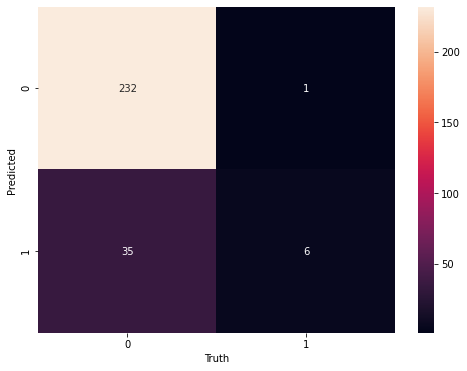

In [73]:
cm = confusion_matrix(y_test, yp) #y_truth, y_predicted

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot =True, fmt='d')
plt.xlabel("Truth")
plt.ylabel('Predicted')

# Hence, we go further with SVM and predict for test.csv 

#We do the same EDA with test.csv and join with click log and then predict output

In [74]:
testing = pd.read_csv('Excels/Hackathon/Test Data.csv')

testing.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,...,usrClusterId_cr,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,...,NaN,NaN,3.337341e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,...,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,...,NaN,348006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,...,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,...,NaN,348010.0,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN


In [75]:
#Now, we concat two dataframes, training and clicklog

test_new = pd.concat([testing, click_log.reindex(testing.index)], axis=1)

test_new.head()

,record_id,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,...,geoDimId,countryDimId,geoGrpDimId,cityDimId,cityGrpDimId,stateDimId,stateGrpDimId,ispDimId,osVerDimId,devTypeDimId
0,1000,82122,1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw,1620000000000,864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8,233531,38,NaN,NaN,145,...,144,144,348011.0,440.0,348005.0,1802.0,348021.0,136127.0,199414.0,196047.0
1,1001,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,6c44c171-9445-4e6b-856e-89bfcd0be22c-1sito,356952,20,NaN,3.1,144,...,144,144,348011.0,10292.0,348005.0,1812.0,348027.0,280429.0,199452.0,196047.0
2,1002,75694,53a9a707-967d-4a67-8e9f-e3dd55b464e8-10wm0,1620000000000,c00eae97-46c5-48b8-89bf-9d45628b9de3-1siz8,356952,18,NaN,3.1,144,...,144,144,348011.0,435.0,348008.0,129163.0,348023.0,280429.0,199414.0,196047.0
3,1003,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,40aad66c-d2da-4635-8b5e-46aca58d2dc6-10o78,355768,21,NaN,NaN,144,...,144,144,348011.0,10255.0,348005.0,1804.0,348027.0,136127.0,199522.0,196047.0
4,1004,30431,5febd7e2-b66a-4af0-91ec-117557684188-10wrk,1620000000000,4742d072-32ed-45bc-9ca9-5dca4a69f5b1-10onw,355768,21,NaN,NaN,144,...,144,144,348011.0,0.0,NaN,1804.0,348027.0,132590.0,199522.0,196047.0


In [76]:
test_new.columns

Index(['record_id', 'clientid_cr', 'clmbuserid_cr', 'conversiontime_cr',
       'imprid_cr', 'adslotdimid_cr', 'algo_cr', 'audiences_cr', 'clickbid_cr',
       'geodimid_cr', 'ip_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'position_cr',
       'pubclientid_cr', 'refurl_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'time_cr', 'adLogType_cr', 'v_cr', 'allAudiences_cr',
       'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'lookUpFrom_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'goalTypeId_cr', 'conversionDurationInMillis_cr',
       'impressionTimeInMillis_cr', 'clickTimeInMillis_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr', 'deviceId_cr',
       'uvh_cr', 'uv_cr', 'platformId_cr', 'sdkVersion_cr', 'usrClusterId_cr',
       'cityGrpDimId_cr', 'siteClusterIds_cr', 'refClusterId_cr', 'paid_cr',
       'spend_cr', 'attributionType_cr', 'conversionid_cr', 'optimize_on_cr',
      

In [77]:
test_new.shape

(455, 83)

In [78]:
x.columns

Index(['clientid_cr', 'adslotdimid_cr', 'itemcolumbiaid_cr', 'pubclientid_cr',
       'siteId_cr', 'goalid_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr', 'crtd',
       'devTypeDimId', 'imprid_cr_le', 'clickip_new', 'ip_new'],
      dtype='object')

In [79]:
test_new.drop(['record_id','conversiontime_cr','audiences_cr','clickbid_cr','ip_cr','position_cr','refurl_cr',
              'templateid_cr','time_cr','adLogType_cr','v_cr','allAudiences_cr','pricingtype_cr',
              'lookUpFrom_cr','connTypeDimId_cr','goalTypeId_cr','conversionDurationInMillis_cr',
       'impressionTimeInMillis_cr', 'clickTimeInMillis_cr','uuidSource_cr', 'stateGrpDimId_cr', 'deviceId_cr',
       'uvh_cr', 'uv_cr', 'platformId_cr', 'sdkVersion_cr', 'usrClusterId_cr',
       'cityGrpDimId_cr', 'siteClusterIds_cr', 'refClusterId_cr', 'paid_cr',
       'spend_cr', 'attributionType_cr', 'conversionid_cr', 'optimize_on_cr',
       'bundleId_cr', 'Unnamed: 0', 'imprId', 'clmbUserId', 'clickBid', 'position','clickGeoId', 'esi','cityGrpDimId',
             'stateGrpDimId' ], axis=1, inplace=True)




test_new.sample(10)

,clientid_cr,clmbuserid_cr,imprid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,pubclientid_cr,siteId_cr,...,clickIp,ip,geoDimId,countryDimId,geoGrpDimId,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId
335,75694,79c4aaff-95f4-4e98-97e1-c3c610aec71d-6m3o,e7066f0b-4466-441d-81e6-a447d0f7f819-1sjd4,129239,38,144,5488088,49504155,15240,178,...,94.204.65.249,94.204.65.249,433,433,348017.0,2942.0,2929.0,0.0,360833.0,196041.0
236,7750,27b9781c-1359-4d98-9713-0c4df4ea0271-10w2k,d12213b6-eb08-4802-ae76-5e53a2a3e766-10nqk,323124,1,144,5609947,53182888,13540,220,...,49.207.210.113,49.207.210.113,144,144,348011.0,436.0,1806.0,266737.0,360149.0,196047.0
325,2139,a45070b3-af53-410f-8014-d0ad277f0893-1sj20,e53cf2a8-6645-4420-94f1-b77639f679f7-10o78,351348,2,144,5610342,53184745,7268,15,...,2001:8f8:182d:974e:8806:775b:4ba4:ac4b,2.48.158.230,433,433,348017.0,0.0,341146.0,146453.0,360833.0,196041.0
260,75694,e59f2197-024e-4aab-a835-f179628f1382-10ofk,d640cc7f-4fce-46aa-adbd-21499898b0fc-10ni8,332775,38,144,5488773,49504155,2658,3,...,204.55.147.7,204.55.147.7,144,144,348011.0,10278.0,1808.0,269720.0,199452.0,196047.0
211,75694,0c524e31-2f23-4011-97ed-658a981934dc-3pmk,cb3046cd-bcd7-4d5c-99d9-206334713964-10oqo,356952,38,144,5488088,49504155,85030,3290,...,103.91.218.226,103.91.218.226,144,144,348011.0,439.0,1815.0,280618.0,199452.0,196047.0
64,75694,a0ca32d0-56fb-433d-92e3-b53de90cde17-h0k8,abc4f6c4-ef01-4754-bbab-d39f174a1d60-1sjlg,350404,18,144,5488773,49504161,82908,3195,...,202.168.84.68,202.168.84.68,144,144,348011.0,0.0,1818.0,0.0,199452.0,196047.0
313,29892,2a5152fd-9018-4135-a128-dfee5f05bc54,e3d38ba8-4247-4fa8-8b3c-3425f3b5277a-631k,349010,33,144,5583264,53930380,76969,2923,...,217.164.239.233,217.164.239.233,433,433,348017.0,0.0,2928.0,146453.0,360956.0,196041.0
319,2139,cf40e311-fe28-4186-a307-d11ce5fde8b6-62qg,e4195245-19ef-479c-a6d5-7f62dd8b2c34-10ni8,332783,33,144,5610373,53924603,2658,3,...,83.110.99.146,83.110.99.146,433,433,348017.0,2942.0,2929.0,146453.0,359919.0,196041.0
62,75694,093822b8-b886-4bb3-8c0e-5607d3966701-10tws,aab7f30b-e3a6-4156-adeb-f2a7f3333ac6-h0k8,129117,38,144,5488773,49504155,2308,4,...,49.207.59.163,49.207.59.163,144,144,348011.0,436.0,1806.0,266737.0,199452.0,196047.0
383,75694,5ffc5b60-8396-41d1-bee3-0ec1981bc0e3-1sk7o,f0346e18-ae2f-44a4-a489-e9deef6f0ff5-3qpg,356952,38,144,5488088,49504155,85030,3290,...,83.110.198.187,83.110.198.187,433,433,348017.0,2942.0,2929.0,146453.0,199452.0,196047.0


In [80]:
test_new.isnull().sum()

clientid_cr          0
clmbuserid_cr        0
imprid_cr            0
adslotdimid_cr       0
algo_cr              0
geodimid_cr          0
itemcolumbiaid_cr    0
itemid_cr            0
pubclientid_cr       0
siteId_cr            0
goalid_cr            0
osId_cr              0
browserId_cr         0
cityId_cr            0
stateId_cr           0
modelDimId_cr        0
ispDimId_cr          0
countryDimId_cr      0
osVerDimId_cr        0
geoGrpDimId_cr       0
adSltDimId           0
itemid               0
pubClientId          0
itmClmbLId           0
siteId               0
crtd                 0
adslotRatio          0
pricingType          0
clickIp              0
ip                   0
geoDimId             0
countryDimId         0
geoGrpDimId          0
cityDimId            0
stateDimId           0
ispDimId             0
osVerDimId           0
devTypeDimId         0
dtype: int64

In [81]:
#now we convert some of the categorical features in to 'one hot encoding'

from sklearn.preprocessing import LabelEncoder

le_clmbuserid_cr = LabelEncoder()
le_imprid_cr = LabelEncoder()

In [82]:
#in input dataframe, we create new columns of these LabelEncoders

test_new['clmbuserid_cr_le'] = le_clmbuserid_cr.fit_transform(test_new['clmbuserid_cr'])
test_new['imprid_cr_le'] = le_imprid_cr.fit_transform(test_new['imprid_cr'])

In [83]:
test_new.drop(['clmbuserid_cr','imprid_cr'], axis=1, inplace=True)

In [84]:
clickip_new=[]
for i in test_new.clickIp:
    
    clickip_new.append(int(ipaddress.ip_address(i)))

In [85]:
len(clickip_new)

455

In [86]:
ip_new=[]
for i in test_new.ip:
    
    ip_new.append(int(ipaddress.ip_address(i)))

In [87]:
len(ip_new)

455

In [88]:
test_new['clickip_new'] = clickip_new
test_new['ip_new'] = ip_new

In [89]:
test_new.drop(['clickIp', 'ip'], axis=1, inplace=True)

In [90]:
test_new.clickip_new =  pd.to_numeric(test_new.clickip_new)

test_new.ip_new =  pd.to_numeric(test_new.ip_new)

In [91]:
test_new.sample(10)

,clientid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,pubclientid_cr,siteId_cr,goalid_cr,osId_cr,...,geoGrpDimId,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new
322,85007,355768,21,144,5614974,53930059,1,3296,10397,196058,...,348017.0,0.0,341146.0,146453.0,360788.0,196041.0,341,316,1.840381e+09,1.840381e+09
148,77274,355768,21,144,5617838,50997160,1,3296,9767,129311,...,348011.0,0.0,1799.0,266737.0,199414.0,196047.0,77,137,3.075644e+09,3.075644e+09
74,2139,354620,1,144,5610374,53184763,82008,3128,722,196058,...,348011.0,10240.0,1802.0,171002.0,199452.0,196047.0,89,63,3.701386e+09,3.701386e+09
424,77713,337642,20,144,5491581,49477556,15240,178,7229,196058,...,348019.0,0.0,0.0,0.0,360833.0,196041.0,426,419,1.502873e+09,1.502873e+09
175,75694,341622,1,144,5488088,49504155,80269,3043,6384,196058,...,348011.0,0.0,1815.0,133765.0,199452.0,196047.0,219,166,1.732690e+09,1.732690e+09
163,31365,351985,6,144,5616679,53930184,83084,3192,4265,129311,...,348011.0,10233.0,1799.0,266906.0,199452.0,196047.0,86,154,1.978806e+09,1.978806e+09
199,75694,342284,1,144,5488773,49504155,16892,549,6384,196063,...,348011.0,10251.0,1803.0,190004.0,199452.0,196047.0,136,191,3.411580e+09,3.411580e+09
342,75694,348324,38,144,5488088,49504155,82030,3130,6384,196058,...,348017.0,0.0,0.0,275235.0,359921.0,196041.0,349,336,1.585553e+09,1.585553e+09
55,2139,321539,18,144,5610343,53184745,65594,2605,722,129311,...,348011.0,10235.0,1800.0,266906.0,0.0,196047.0,123,44,1.979614e+09,1.979614e+09
355,75694,341626,1,144,5488773,49504155,80269,3045,6384,196063,...,348017.0,0.0,0.0,168516.0,360788.0,196041.0,371,350,1.507036e+09,1.507036e+09


In [92]:
test_new.dtypes

clientid_cr            int64
adslotdimid_cr         int64
algo_cr                int64
geodimid_cr            int64
itemcolumbiaid_cr      int64
itemid_cr              int64
pubclientid_cr         int64
siteId_cr              int64
goalid_cr              int64
osId_cr                int64
browserId_cr           int64
cityId_cr              int64
stateId_cr             int64
modelDimId_cr          int64
ispDimId_cr            int64
countryDimId_cr        int64
osVerDimId_cr          int64
geoGrpDimId_cr         int64
adSltDimId             int64
itemid                 int64
pubClientId            int64
itmClmbLId             int64
siteId                 int64
crtd                 float64
adslotRatio          float64
pricingType          float64
geoDimId               int64
countryDimId           int64
geoGrpDimId          float64
cityDimId            float64
stateDimId           float64
ispDimId             float64
osVerDimId           float64
devTypeDimId         float64
clmbuserid_cr_

In [93]:
test_scale =  test_new.copy()

In [94]:
#for ML/DL model, we need to scale the values from 0 to 1.

from sklearn import preprocessing

scaler= preprocessing.MinMaxScaler()

cols_to_scale = ['clientid_cr','adslotdimid_cr','algo_cr','geodimid_cr','itemcolumbiaid_cr','itemid_cr','pubclientid_cr','siteId_cr','goalid_cr','osId_cr',
                 'browserId_cr','cityId_cr','stateId_cr','modelDimId_cr','ispDimId_cr','osVerDimId_cr','geoGrpDimId_cr',
                'adSltDimId','itemid','pubClientId','itmClmbLId','siteId','crtd', 'adslotRatio','pricingType','countryDimId',
                'cityDimId','geoDimId','stateDimId','ispDimId','osVerDimId','devTypeDimId','clmbuserid_cr_le',
                'imprid_cr_le','clickip_new','ip_new']

test_scale[cols_to_scale]= scaler.fit_transform(test_scale[cols_to_scale])

In [95]:
test_scale.sample(5)

,clientid_cr,adslotdimid_cr,algo_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,pubclientid_cr,siteId_cr,goalid_cr,osId_cr,...,geoGrpDimId,cityDimId,stateDimId,ispDimId,osVerDimId,devTypeDimId,clmbuserid_cr_le,imprid_cr_le,clickip_new,ip_new
210,0.073033,0.844278,0.000654,0.00000,0.996291,0.633407,0.771666,0.792287,0.072229,0.358580,...,348011.0,0.000000,0.005279,0.979856,0.552566,1.00000,0.972477,0.447894,8.578309e-01,8.578309e-01
102,0.873600,0.996179,0.001423,0.00000,0.944367,0.766087,1.000000,0.998178,0.592350,0.543683,...,348011.0,0.031942,0.005326,0.979856,1.000000,0.99991,0.190367,0.201774,8.578309e-01,8.578309e-01
28,0.948582,0.456536,0.000000,0.00346,0.960556,0.960560,0.031248,0.000000,0.805334,0.543678,...,348011.0,0.000000,0.005309,0.475646,0.999659,0.99991,0.834862,0.046563,8.570902e-01,8.570902e-01
357,0.873600,0.996179,0.000731,0.00000,0.944654,0.766087,1.000000,0.998178,0.592350,0.543683,...,348017.0,0.000000,0.008583,0.511726,0.999659,0.99991,0.784404,0.780488,7.618480e-01,5.281391e-29
153,0.873600,0.996179,0.001423,0.00000,0.944367,0.766087,1.000000,0.998178,0.592350,0.543683,...,348011.0,0.031713,0.005282,0.594216,0.552461,1.00000,0.236239,0.317073,3.073712e-29,3.073712e-29


In [96]:
test_scale.columns

Index(['clientid_cr', 'adslotdimid_cr', 'algo_cr', 'geodimid_cr',
       'itemcolumbiaid_cr', 'itemid_cr', 'pubclientid_cr', 'siteId_cr',
       'goalid_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr',
       'geoGrpDimId_cr', 'adSltDimId', 'itemid', 'pubClientId', 'itmClmbLId',
       'siteId', 'crtd', 'adslotRatio', 'pricingType', 'geoDimId',
       'countryDimId', 'geoGrpDimId', 'cityDimId', 'stateDimId', 'ispDimId',
       'osVerDimId', 'devTypeDimId', 'clmbuserid_cr_le', 'imprid_cr_le',
       'clickip_new', 'ip_new'],
      dtype='object')

In [97]:
test_scale.drop(['algo_cr','geodimid_cr','itemid_cr','osId_cr','modelDimId_cr',
                 'geoGrpDimId_cr', 'adSltDimId', 'itemid', 'pubClientId', 'itmClmbLId', 
       'siteId', 'adslotRatio', 'pricingType',
        'geoDimId', 'countryDimId', 'geoGrpDimId',
       'cityDimId', 'stateDimId', 'ispDimId', 'osVerDimId','clmbuserid_cr_le',], axis=1, inplace=True)

In [98]:
test_scale.shape

(455, 17)

In [99]:
test_scale.columns

Index(['clientid_cr', 'adslotdimid_cr', 'itemcolumbiaid_cr', 'pubclientid_cr',
       'siteId_cr', 'goalid_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr', 'crtd',
       'devTypeDimId', 'imprid_cr_le', 'clickip_new', 'ip_new'],
      dtype='object')

In [100]:
data3.columns

Index(['clientid_cr', 'adslotdimid_cr', 'itemcolumbiaid_cr', 'pubclientid_cr',
       'siteId_cr', 'goalid_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'ispDimId_cr', 'countryDimId_cr', 'osVerDimId_cr', 'crtd',
       'devTypeDimId', 'imprid_cr_le', 'clickip_new', 'ip_new',
       'conversion_fraud_le'],
      dtype='object')

In [101]:
test_scale.head()

,clientid_cr,adslotdimid_cr,itemcolumbiaid_cr,pubclientid_cr,siteId_cr,goalid_cr,browserId_cr,cityId_cr,stateId_cr,ispDimId_cr,countryDimId_cr,osVerDimId_cr,crtd,devTypeDimId,imprid_cr_le,clickip_new,ip_new
0,0.948582,0.456536,0.960556,0.031248,0.000000,0.805334,0.000000,0.000000,0.007158,0.928105,145,0.000000,0.0,1.0,0.088692,3.088893e-29,3.655518e-29
1,0.873600,0.996179,0.944654,1.000000,0.998178,0.592350,0.661309,0.030820,0.005300,0.979856,144,0.551710,0.0,1.0,0.079823,8.578309e-01,8.578309e-01
2,0.873600,0.996179,0.944367,1.000000,0.998178,0.592350,0.661309,0.030820,0.005300,0.979856,144,0.551710,0.0,1.0,0.312639,8.574363e-01,8.574363e-01
3,0.345616,0.991002,0.997243,0.000000,1.000000,0.306283,0.660130,0.030703,0.005279,0.979856,144,0.998301,0.0,1.0,0.037694,3.179087e-29,3.179087e-29
4,0.345616,0.991002,0.997243,0.000000,1.000000,0.306283,0.660130,0.030703,0.005279,0.979856,144,0.998301,0.0,1.0,0.048780,3.069593e-29,3.069593e-29


In [102]:
test_predicted = model.predict(test_scale)

test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
df= pd.DataFrame(test_predicted, columns=['conversion_fraud'])
df

,conversion_fraud
0,0
1,0
2,0
3,0
4,0
...,...
450,0
451,0
452,0
453,0


In [104]:
record = testing.record_id
df2 = pd.DataFrame(record, columns= ['record_id'])

df2

,record_id
0,1000
1,1001
2,1002
3,1003
4,1004
...,...
450,1450
451,1451
452,1452
453,1453


In [105]:
sample_sub=  pd.concat([df2, df], axis=1)

sample_sub

,record_id,conversion_fraud
0,1000,0
1,1001,0
2,1002,0
3,1003,0
4,1004,0
...,...,...
450,1450,0
451,1451,0
452,1452,0
453,1453,0


In [106]:
sample_sub.conversion_fraud.unique()

array([0, 1], dtype=int64)

In [107]:
sample_sub.reset_index(drop=True, inplace=True)

sample_sub

,record_id,conversion_fraud
0,1000,0
1,1001,0
2,1002,0
3,1003,0
4,1004,0
...,...,...
450,1450,0
451,1451,0
452,1452,0
453,1453,0


In [108]:
sample_sub['conversion_fraud'].replace({1:'TRUE', 0: 'FALSE'}, inplace=True)

sample_sub

,record_id,conversion_fraud
0,1000,FALSE
1,1001,FALSE
2,1002,FALSE
3,1003,FALSE
4,1004,FALSE
...,...,...
450,1450,FALSE
451,1451,FALSE
452,1452,FALSE
453,1453,FALSE


In [109]:
sample_sub.conversion_fraud.unique()

array(['FALSE', 'TRUE'], dtype=object)

# TRUE = Conversion Fraud


# FALSE = Not a Conversion Fraud

In [110]:
sample_sub.to_csv('Excels/Hackathon/Hackathon_Sample_Submission.csv')

# Here, we get the required final 'Sample Submission CSV'